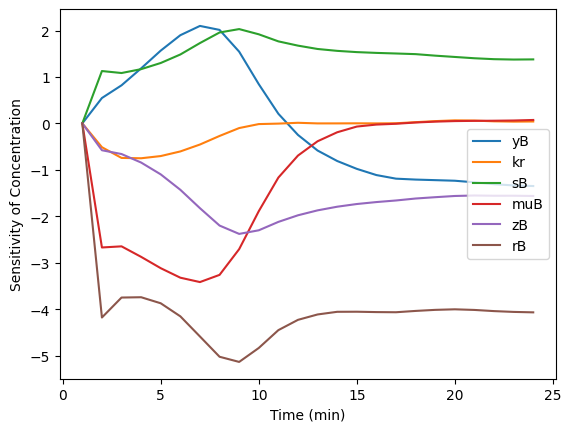

<Figure size 10000x4800 with 0 Axes>

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

sol = [4.35923617e-01, 1.51728394e+05, 4.56628831e-05, 3.63518130e+00,
       4.51944641e+00, 1.47636087e+00]
data = pd.read_excel('data.xlsx')
s=1.38476998e-05
mu=7
time = np.linspace(1, 24, 24)
hbin = 2.7E-5
hpin = hbin/2
hpx = [1, 24]
hpy = [hpin, 0]
ic = ([data.loc[0, "hpadj mol/dL"], hpin, data.loc[0, "cadj mol/dL"]])

def func(x, t, yB, kr, sB, muB, zB, rB):
    B, P, C = x
    dB = - kr * B * P + sB/((((t*yB-muB)**2)+zB)**(rB))
    dP = - kr * B * P
    dC = s/((((t-mu)**2)+1)**(3/2))
    return(dB, dP, dC)

y = odeint(func, ic, data["time"], args=(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5]))
y1 = odeint(func, ic, data["time"], args=(sol[0]*1.01, sol[1], sol[2], sol[3], sol[4], sol[5]))
y2 = odeint(func, ic, data["time"], args=(sol[0], sol[1]*1.01, sol[2], sol[3], sol[4], sol[5]))
y3 = odeint(func, ic, data["time"], args=(sol[0], sol[1], sol[2]*1.01, sol[3], sol[4], sol[5]))
y4 = odeint(func, ic, data["time"], args=(sol[0], sol[1], sol[2], sol[3]*1.01, sol[4], sol[5]))
y5 = odeint(func, ic, data["time"], args=(sol[0], sol[1], sol[2], sol[3], sol[4]*1.01, sol[5]))
y6 = odeint(func, ic, data["time"], args=(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5]*1.01))

#print(fitdata)
plt.ylabel("Sensitivity of Concentration")
plt.plot(data["time"], ((y1[:,0] - y[:,0])/y[:,0])/0.01, label = "yB")
plt.plot(data["time"], ((y2[:,0] - y[:,0])/y[:,0])/0.01, label = "kr")
plt.plot(data["time"],((y3[:,0] - y[:,0])/y[:,0])/0.01, label = "sB")
plt.plot(data["time"], ((y4[:,0] - y[:,0])/y[:,0])/0.01, label = "muB")
plt.plot(data["time"],((y5[:,0] - y[:,0])/y[:,0])/0.01, label = "zB")
plt.plot(data["time"],((y6[:,0] - y[:,0])/y[:,0])/0.01, label = "rB")
plt.xlabel("Time (min)")
plt.ylabel("Sensitivity of Concentration")
plt.legend(loc = "right")
plt.figure(figsize = (100, 48))
plt.show()

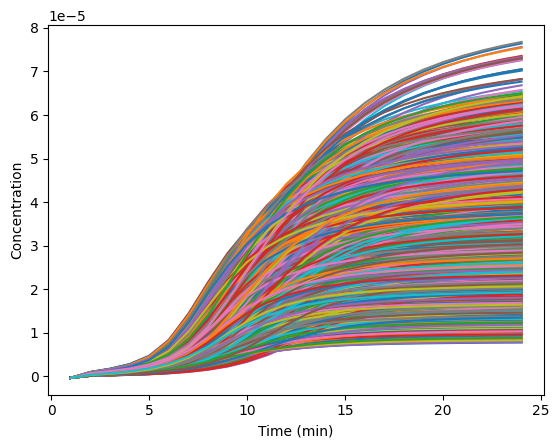

In [9]:
N = 1000
perc = 0.8
yB = np.random.uniform(sol[0]*perc,sol[0]*(2-perc),N)
kr = np.random.uniform(sol[1]*perc,sol[1]*(2-perc),N)
rB = np.random.uniform(sol[5]*perc,sol[5]*(2-perc),N)

P = np.zeros(N)

for m in np.arange(0,N,1):
    output = odeint(func, y0=ic, t=time, args = (yB[m], kr[m],sol[2],sol[3], sol[4], rB[m]));
    plt.plot(data["time"],output[:,0])
    plt.xlabel("Time (min)")
    plt.ylabel("Concentration")
    P[m]=output[-1,1]